<a href="https://colab.research.google.com/github/Vincent222372/vincent222372.github.io/blob/main/ASM_7428_BussinessSupport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Retail_sales.csv to Retail_sales.csv


In [2]:
# Step 1: Data Collection – ABC Manufacturing (Retail Sales Data Integration)
import pandas as pd
df = pd.read_csv('Retail_sales.csv')

# Display first 5 rows of the dataset
print("📌 First 5 rows of the dataset:")
display(df.head())

# Basic structure of the dataset
print("\n📌 Dataset Information:")
df.info()

# Check for missing values
print("\n📌 Missing Values:")
print(df.isnull().sum())

# Basic statistical summary
print("\n📌 Descriptive Statistics:")
display(df.describe())

# Show the number of unique values per column
print("\n📌 Unique Values in Each Column:")
print(df.nunique())

📌 First 5 rows of the dataset:


,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False



📌 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB

📌 Missing Values:
Store ID                 0
Product ID               0
Date                     0
Units Sold          

,Product ID,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD)
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.461294e+07,6.161967,2749.509593,2.973833,49.944033
std,2.779759e+07,3.323929,2568.639288,5.974530,64.401655
min,3.636541e+06,0.000000,0.000000,0.000000,0.000000
25%,2.228600e+07,4.000000,882.592500,0.000000,0.000000
50%,4.002449e+07,6.000000,1902.420000,0.000000,1.000000
75%,6.559352e+07,8.000000,3863.920000,0.000000,100.000000
max,9.628253e+07,56.000000,27165.880000,20.000000,199.000000



📌 Unique Values in Each Column:
Store ID                    1
Product ID                 42
Date                      731
Units Sold                 32
Sales Revenue (USD)      2545
Discount Percentage         5
Marketing Spend (USD)     200
Store Location            243
Product Category            4
Day of the Week             7
Holiday Effect              2
dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load the Retail_sales.csv file into a DataFrame
df = pd.read_csv('Retail_sales.csv')

# --- Data Preprocessing for Charts and Model ---
print("--- Step 1: Data Collection & Initial Preprocessing ---")
# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display information about the DataFrame, including data types and non-null values
print("\nDataFrame Info:")
print(df.info())

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract month for Line Chart
df['Month'] = df['Date'].dt.month_name()
print("\nData loading and initial preprocessing complete.\n")

--- Step 1: Data Collection & Initial Preprocessing ---

First 5 rows of the DataFrame:
| Store ID   | Product ID   | Date       | Units Sold   | Sales Revenue (USD)   | Discount Percentage   | Marketing Spend (USD)   | Store Location            | Product Category   | Day of the Week   | Holiday Effect   |
|:-----------|:-------------|:-----------|:-------------|:----------------------|:----------------------|:------------------------|:--------------------------|:-------------------|:------------------|:-----------------|
| Spearsland | 52372247     | 2022-01-01 | 9            | 2741.69               | 20                    | 81                      | Tanzania                  | Furniture          | Saturday          | False            |
| Spearsland | 52372247     | 2022-01-02 | 7            | 2665.53               | 0                     | 0                       | Mauritania                | Furniture          | Sunday            | False            |
| Spearsland | 52372247     | 20

--- Generating Column Chart: Total Sales Revenue by Product Category ---


/tmp/ipython-input-3949981668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='viridis')


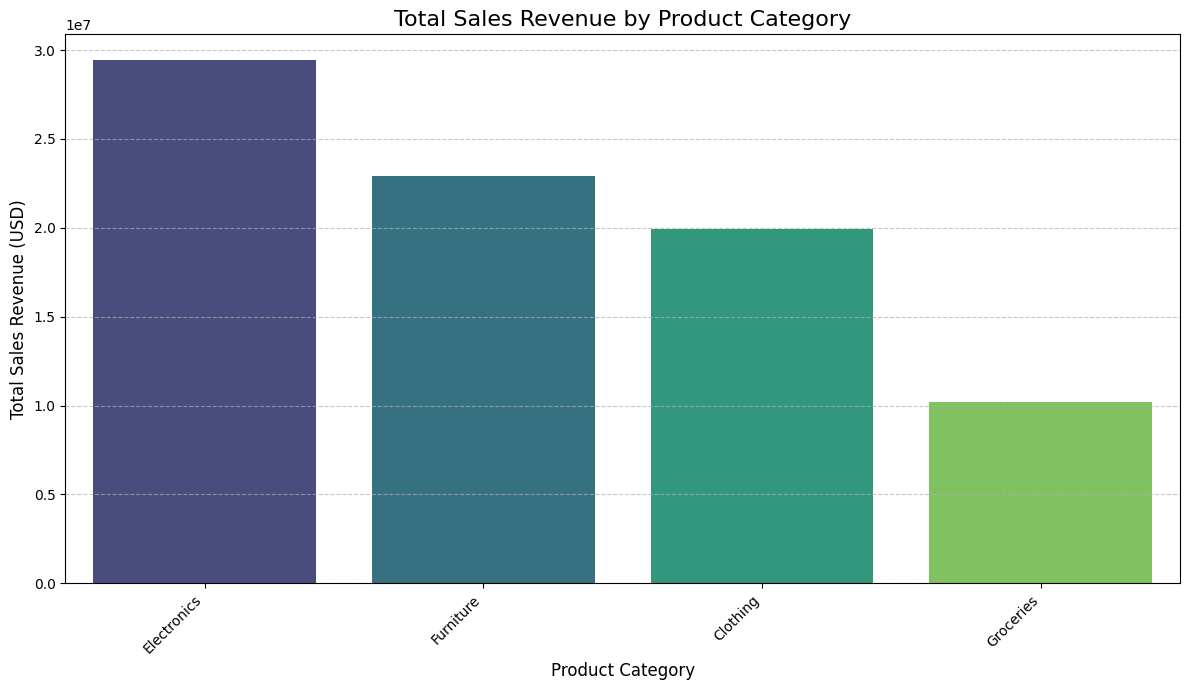

Column Chart generated successfully.



In [4]:
# --- 2. Chart Generation: Column Chart ---
print("--- Generating Column Chart: Total Sales Revenue by Product Category ---")
plt.figure(figsize=(12, 7))
product_revenue = df.groupby('Product Category')['Sales Revenue (USD)'].sum().sort_values(ascending=False)
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='viridis')
plt.title('Total Sales Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Column Chart generated successfully.\n")

--- Generating Line Chart: Monthly Sales Revenue Fluctuation ---


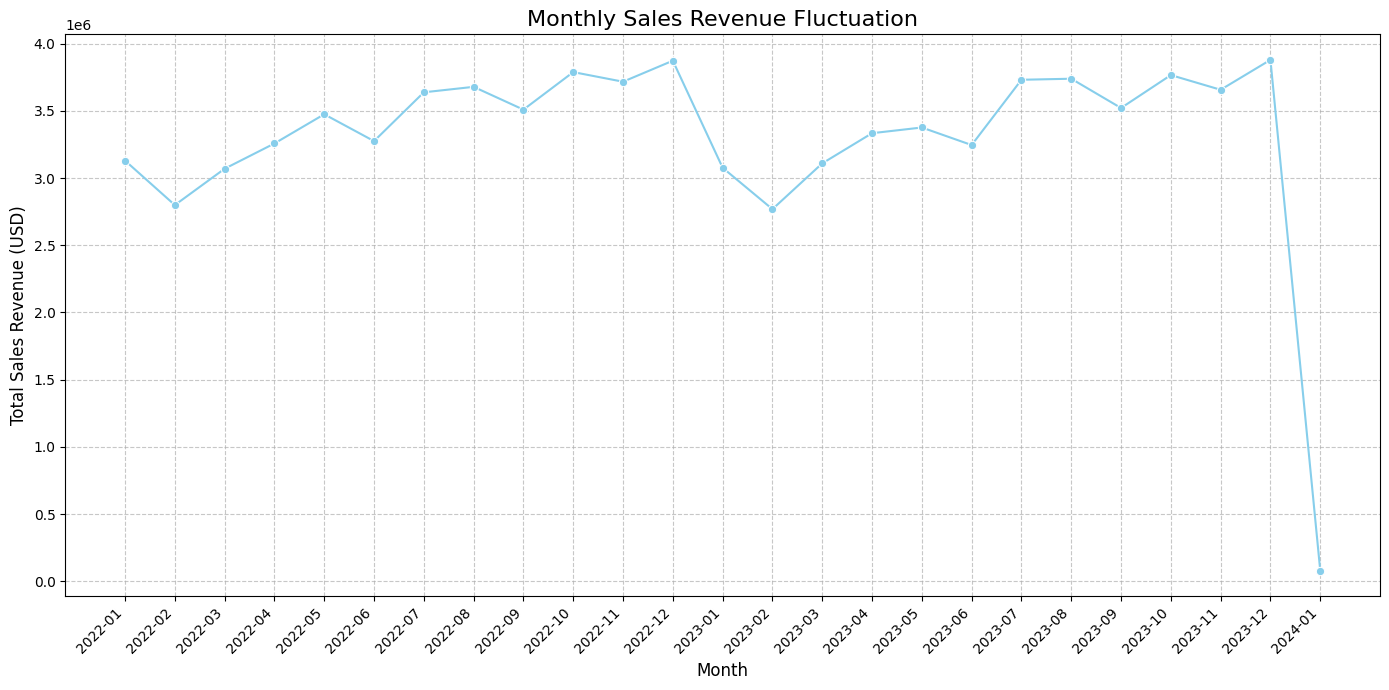

Line Chart generated successfully.



In [5]:
# --- 3. Chart Generation: Line Chart ---
print("--- Generating Line Chart: Monthly Sales Revenue Fluctuation ---")
plt.figure(figsize=(14, 7))
# Aggregate sales revenue by month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales Revenue (USD)'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].astype(str) # Convert Period to string for plotting
sns.lineplot(x='Date', y='Sales Revenue (USD)', data=monthly_sales, marker='o', color='skyblue')
plt.title('Monthly Sales Revenue Fluctuation', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Line Chart generated successfully.\n")

--- Generating Pie Chart: Percentage Share of Sales by Store Location ---


/tmp/ipython-input-2868264511.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


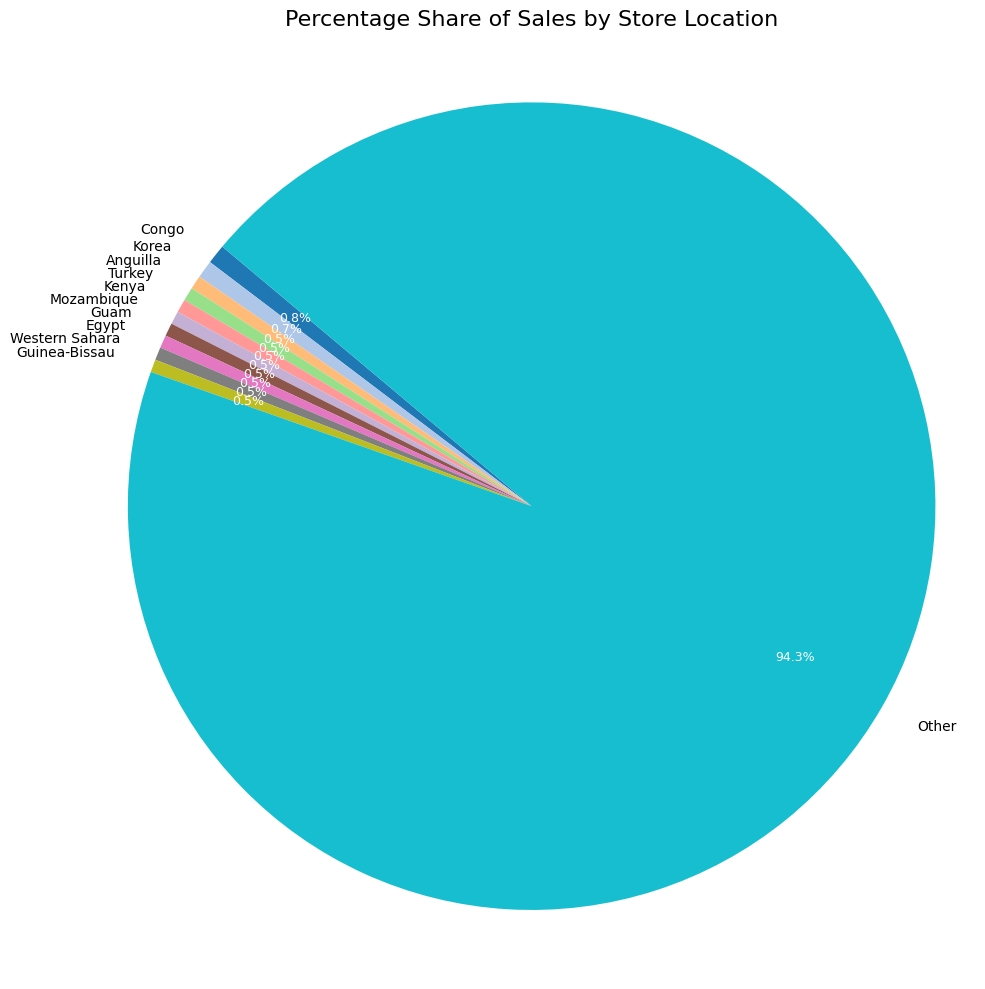

Pie Chart generated successfully.



In [6]:
# --- 4. Chart Generation: Pie Chart ---
print("--- Generating Pie Chart: Percentage Share of Sales by Store Location ---")
plt.figure(figsize=(10, 10)) # Keep figure size suitable for a solid pie
location_sales = df.groupby('Store Location')['Sales Revenue (USD)'].sum().sort_values(ascending=False)

# Take top N locations and group the rest as 'Other' to avoid clutter
top_n = 10
if len(location_sales) > top_n:
    other_sales = location_sales.iloc[top_n:].sum()
    location_sales = location_sales.iloc[:top_n]
    location_sales['Other'] = other_sales

# Generate colors for the pie chart
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i / len(location_sales)) for i in range(len(location_sales))]

# Plotting the pie chart
wedges, texts, autotexts = plt.pie(location_sales,
                                   labels=location_sales.index, # Category labels
                                   autopct='%1.1f%%',       # Percentages
                                   startangle=140,
                                   colors=colors,
                                   pctdistance=0.75,         # Position of percentage text (closer to center)
                                   labeldistance=1.1,        # Position of category labels (outside)
                                   textprops={'fontsize': 10, 'color': 'black'}) # General text properties

# Ensure percentage text is visible (e.g., set color to white if on dark slice)
for autotext in autotexts:
    autotext.set_color('white') # Set percentage text to white for better contrast
    autotext.set_fontsize(9) # Adjust size if needed

plt.title('Percentage Share of Sales by Store Location', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
print("Pie Chart generated successfully.\n")

--- Generating Heatmap: Correlation Matrix ---


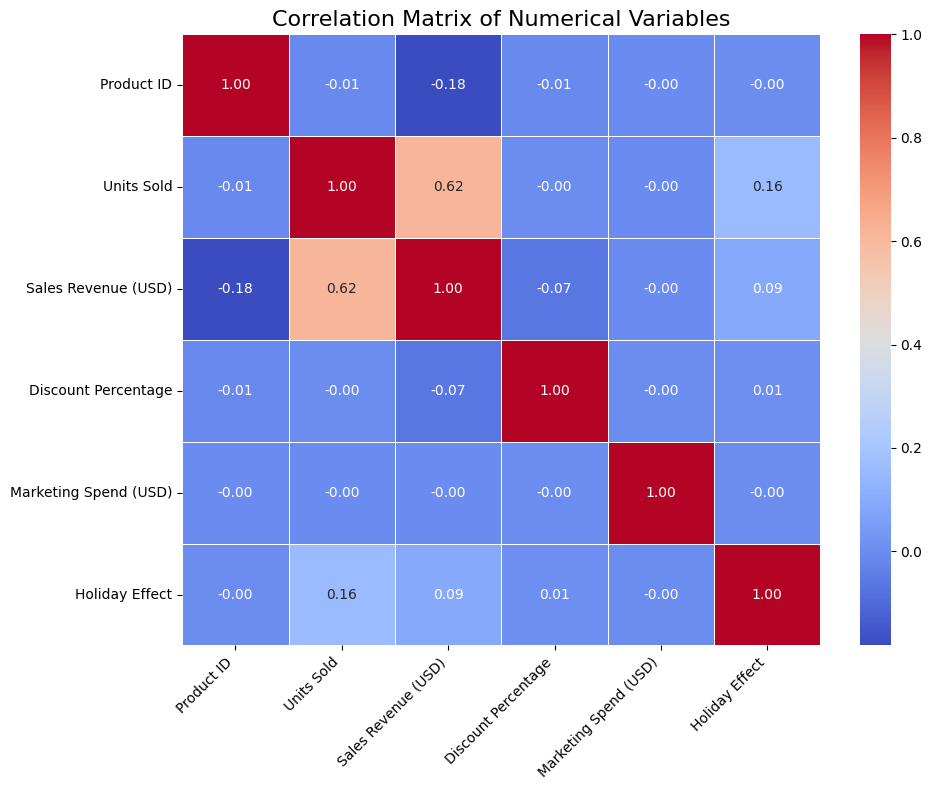

Heatmap generated successfully.



In [7]:
# --- 5. Chart Generation: Heatmap ---
print("--- Generating Heatmap: Correlation Matrix ---")
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation (including bool as it can be treated numerically)
numerical_df = df.select_dtypes(include=['int64', 'float64', 'bool'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("Heatmap generated successfully.\n")

--- Generating Box Plot: Distribution of Sales Revenue by Product Category ---


/tmp/ipython-input-3772017151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Category', y='Sales Revenue (USD)', data=df, palette='Set3')


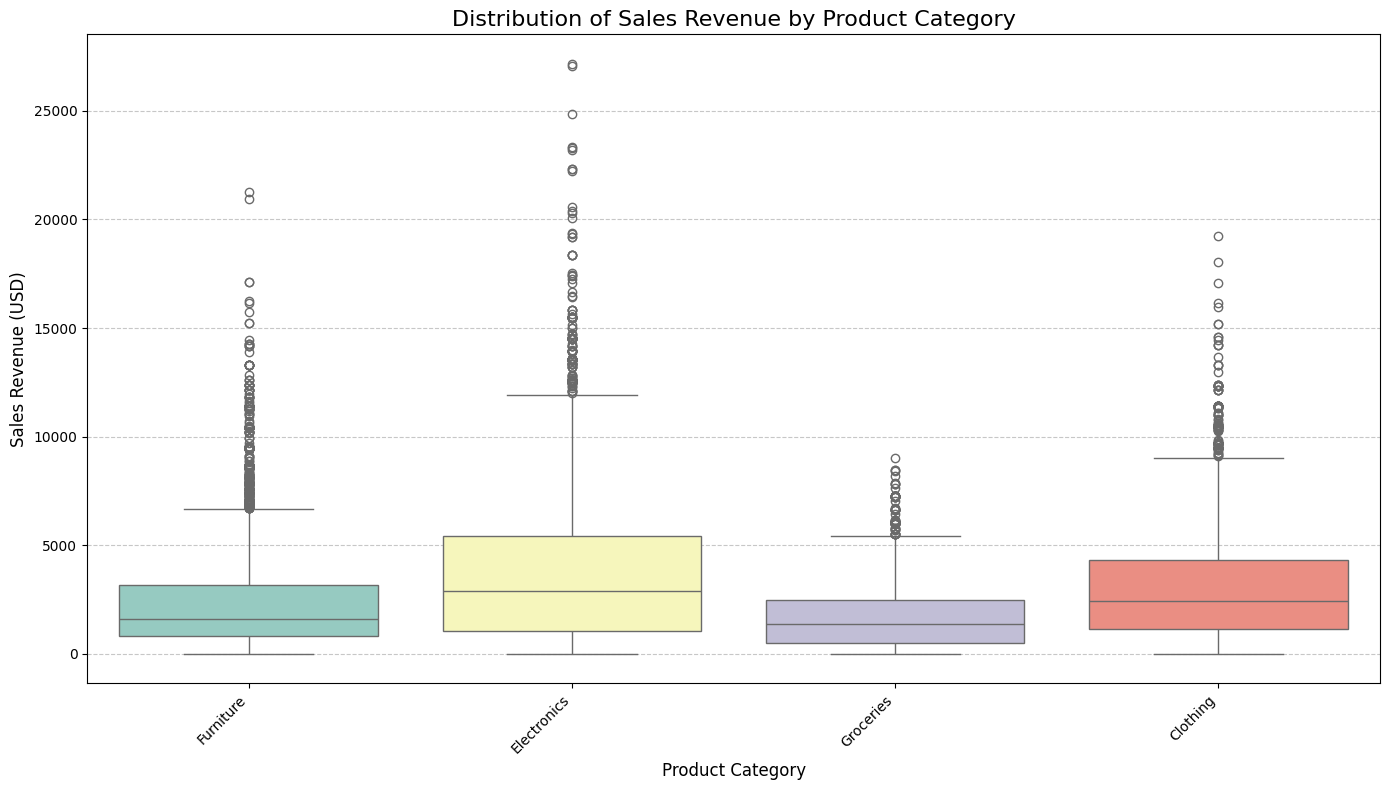

Box Plot generated successfully.



In [9]:
# --- 6. Chart Generation: Box Plot ---
print("--- Generating Box Plot: Distribution of Sales Revenue by Product Category ---")
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product Category', y='Sales Revenue (USD)', data=df, palette='Set3')
plt.title('Distribution of Sales Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Sales Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Box Plot generated successfully.\n")

In [10]:
# --- 7. Linear Regression Model ---
print("\n--- Building Linear Regression Model ---")

# Select features and target variable
# Drop 'Store ID' and 'Product ID' as they are identifiers and not directly predictive features
# 'Date' and 'Month' are already processed or not directly used as features for this model, so drop them too
df_model = df.drop(['Store ID', 'Product ID', 'Date', 'Month'], axis=1)

# Separate features (X) and target (y)
X = df_model.drop('Sales Revenue (USD)', axis=1)
y = df_model['Sales Revenue (USD)']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical features
X_processed = pd.concat([X[numerical_cols], encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Display coefficients (for numerical features and some encoded features)
print("\nModel Coefficients (Top 10 by Absolute Value):")
coefficients = pd.DataFrame({'Feature': X_processed.columns, 'Coefficient': model.coef_})
# Sort by absolute coefficient value to see most influential features
coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
print(coefficients.sort_values(by='Abs_Coefficient', ascending=False).head(10).to_markdown(index=False, numalign="left", stralign="left"))

print("\nLinear Regression Model built and evaluated successfully.")


--- Building Linear Regression Model ---
Mean Squared Error (MSE): 3964940.54
Root Mean Squared Error (RMSE): 1991.22
R-squared (R2): 0.41

Model Coefficients (Top 10 by Absolute Value):
| Feature                                 | Coefficient   | Abs_Coefficient   |
|:----------------------------------------|:--------------|:------------------|
| Store Location_Spain                    | -588.055      | 588.055           |
| Product Category_Groceries              | -552.778      | 552.778           |
| Store Location_Saint Helena             | -511.057      | 511.057           |
| Store Location_United States of America | -509.849      | 509.849           |
| Store Location_Fiji                     | -490.368      | 490.368           |
| Product Category_Electronics            | 489.256       | 489.256           |
| Store Location_Egypt                    | 485.252       | 485.252           |
| Store Location_Lesotho                  | 480.92        | 480.92            |
| Store Loca